<a href="https://colab.research.google.com/github/AlejandroAlvaro23/Challenge-1-Data-Science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0

    for venta in datos_tienda:
       precio = float(venta['Preço'])
       facturacion_tienda += precio

    print(f"Facturación Tienda {i+1}: ${facturacion_tienda:.2f}")
    total_facturacion += facturacion_tienda

print(f"\nFacturación total de todas las tiendas: ${total_facturacion:.2f}")

Facturación Tienda 1: $1384497.58
Facturación Tienda 2: $1488459.06
Facturación Tienda 3: $1464025.03
Facturación Tienda 4: $1384497.58

Facturación total de todas las tiendas: $5721479.25


In [ ]:
facturacion_tienda1 = loja['Preço'].astype(float).sum()
facturacion_tienda2 = loja2['Preço'].astype(float).sum()
facturacion_tienda3 = loja3['Preço'].astype(float).sum()
facturacion_tienda4 = loja4['Preço'].astype(float).sum()

print(f"Facturación Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación Tienda 4: ${facturacion_tienda4:.2f}")

facturacion_total = facturacion_tienda1 + facturacion_tienda2 + facturacion_tienda3 + facturacion_tienda4
print(f"\nFacturación total de todas las tiendas: ${facturacion_total:.2f}")


Facturación Tienda 1: $1534509.12
Facturación Tienda 2: $1488459.06
Facturación Tienda 3: $1464025.03
Facturación Tienda 4: $1384497.58

Facturación total de todas las tiendas: $5871490.79


# 2. Vendas por Categoria


In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

ventas_por_categoria = {}

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nVentas por categoría en Tienda {i+1}:")

    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoria do Produto']
        precio = float(venta['Preço'])
        cantidad = int(venta['Quantidade de parcelas'])
        monto_venta = precio * cantidad

        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    for categoria, monto in categorias_tienda.items():
        print(f"  {categoria}: ${monto:.2f}")

print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")

total_general = sum(ventas_por_categoria.values())
print(f"\nTotal general de ventas: ${total_general:.2f}")


Ventas por categoría en Tienda 1:
  eletrodomesticos: $1172119.35
  moveis: $742172.64
  esporte e lazer: $133411.27
  livros: $39390.51
  eletronicos: $1615256.00
  instrumentos musicais: $297117.55
  brinquedos: $72849.77
  utilidades domesticas: $59436.05

Ventas por categoría en Tienda 2:
  moveis: $703108.03
  instrumentos musicais: $392599.48
  esporte e lazer: $108879.57
  eletronicos: $1715519.72
  utilidades domesticas: $56984.93
  brinquedos: $62300.37
  eletrodomesticos: $1368304.66
  livros: $41887.42

Ventas por categoría en Tienda 3:
  eletrodomesticos: $1441845.38
  moveis: $740123.50
  instrumentos musicais: $333781.40
  esporte e lazer: $164527.29
  eletronicos: $1468443.69
  brinquedos: $81591.72
  utilidades domesticas: $59635.75
  livros: $35142.69

Ventas por categoría en Tienda 4:
  eletrodomesticos: $1172119.35
  moveis: $742172.64
  esporte e lazer: $133411.27
  livros: $39390.51
  eletronicos: $1615256.00
  instrumentos musicais: $297117.55
  brinquedos: $7284

In [ ]:
def ventas_por_categoria(tienda, numero):
    ventas = tienda.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVentas por categoría en Tienda {numero}:")
    print(ventas)

ventas_por_categoria(loja, 1)
ventas_por_categoria(loja2, 2)
ventas_por_categoria(loja3, 3)
ventas_por_categoria(loja4, 4)


Ventas por categoría en Tienda 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Ventas por categoría en Tienda 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Ventas por categoría en Tienda 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis

# 3. Média de Avaliação das Lojas

In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:
            if 'Avaliação da compra' in producto:
                calificacion = float(producto['Avaliação da compra'])
            elif 'Avaliação da compra' in producto:
                calificacion = float(producto['Avaliação da compra'])
            elif 'Avaliação da compra' in producto:
                calificacion = float(producto['Avaliação da compra'])
            elif 'Avaliação da compra' in producto:
                calificacion = float(producto['Avaliação da compra'])
            else:
                print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                raise KeyError("No se encontró la columna de calificación")

            suma_calificaciones += calificacion
            cantidad_productos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            continue

    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la Tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar calificaciones para la Tienda {i+1}")

Calificación promedio de la Tienda 1: 4.00
Calificación promedio de la Tienda 2: 4.04
Calificación promedio de la Tienda 3: 4.05
Calificación promedio de la Tienda 4: 4.00


In [ ]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Avaliação da compra'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

clasificacion_promedio(loja, 1)
clasificacion_promedio(loja2, 2)
clasificacion_promedio(loja2, 3)
clasificacion_promedio(loja4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.04
Clasificación promedio en Tienda 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
from urllib.request import urlopen
import csv
from collections import defaultdict

def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Produto']
        precio = float(venta['Preço'])
        ingreso_por_producto[producto] += precio

    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:.2f}")

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  Celular Plus X42 - Ingresos: $128930.07
  TV Led UHD 4K - Ingresos: $120393.25
  Smart TV - Ingresos: $110387.57

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Dinossauro Rex - Ingresos: $1143.94
  Cubo mágico 8x8 - Ingresos: $997.38
  Corda de pular - Ingresos: $939.74

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Celular Plus X42 - Ingresos: $150967.83
  TV Led UHD 4K - Ingresos: $137833.06
  Geladeira - Ingresos: $130176.48

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Corda de pular - Ingresos: $1142.54
  Dinossauro Rex - Ingresos: $1027.41
  Cubo mágico 8x8 - Ingresos: $858.22

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Geladeira - Ingresos: $133185.99
  TV Led UHD 4K - Ingresos: $128892.11
  Celular Plus X42 - Ingresos: $124300.84

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Corda de pular - Ingresos: $1137.76
  Dinossauro Rex - Ingresos: $1060.78
  Cubo mágico 8x8 - 

In [ ]:
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

df_total['Ingreso'] = df_total['Preço']

ventas = df_total.groupby(['Tienda', 'Produto'])['Ingreso'].sum().reset_index()

def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]

    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f"  {fila['Produto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
         print(f"  {fila['Produto']} - Ingresos: ${fila['Ingreso']:.2f}")

tiendas_unicas = ventas['Tienda'].unique()

for tienda in tiendas_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  Celular Plus X42 - Ingresos: $128930.07
  TV Led UHD 4K - Ingresos: $120393.25
  Smart TV - Ingresos: $110387.57

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Corda de pular - Ingresos: $939.74
  Cubo mágico 8x8 - Ingresos: $997.38
  Dinossauro Rex - Ingresos: $1143.94

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Celular Plus X42 - Ingresos: $150967.83
  TV Led UHD 4K - Ingresos: $137833.06
  Geladeira - Ingresos: $130176.48

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $858.22
  Dinossauro Rex - Ingresos: $1027.41
  Corda de pular - Ingresos: $1142.54

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Geladeira - Ingresos: $133185.99
  TV Led UHD 4K - Ingresos: $128892.11
  Celular Plus X42 - Ingresos: $124300.84

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $853.81
  Dinossauro Rex - Ingresos: $1060.78
  Corda de pular - I

# 5. Frete Médio por Loja


In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Frete'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $31.28
Tienda 2 - Envío promedio: $33.62
Tienda 3 - Envío promedio: $33.07
Tienda 4 - Envío promedio: $31.28


In [ ]:
df_total['Frete'] = df_total['Frete'].astype(float)

envio_promedio = df_total.groupby('Tienda')['Frete'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")


Envío promedio por tienda:
Tienda 1: $31.28
Tienda 2: $33.62
Tienda 3: $33.07
Tienda 4: $31.28


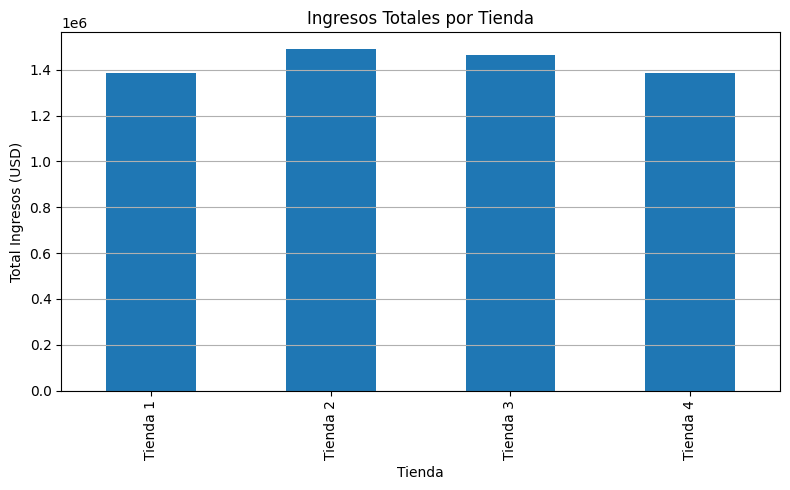

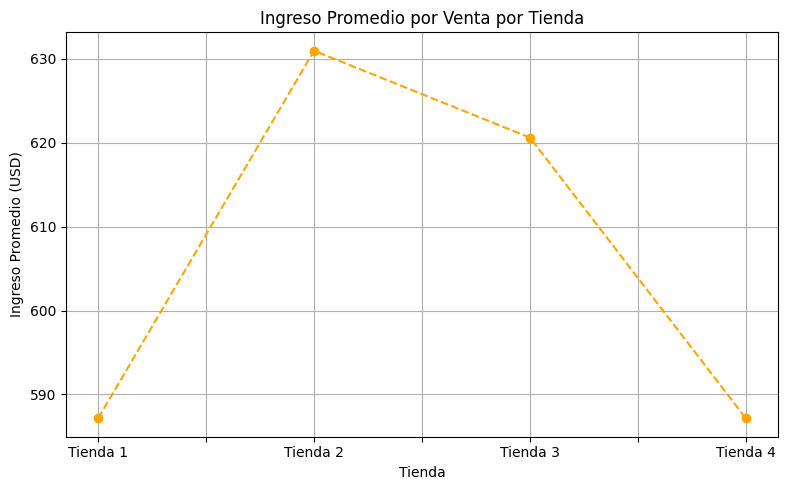

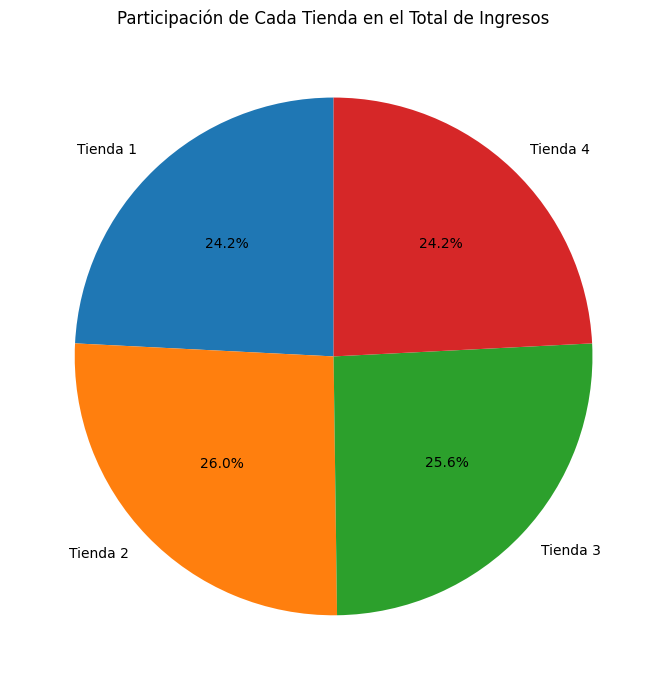

In [ ]:
import matplotlib.pyplot as plt

df_total['Preço'] = df_total['Preço'].astype(float)

df_total['Preço'] = df_total['Preço'].astype(float)

df_total['Ingreso'] = df_total['Preço']

ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales

plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Ingreso Promedio por Venta por Tienda')
plt.ylabel('Ingreso Promedio (USD)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))
distribucion_ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participación de Cada Tienda en el Total de Ingresos')
plt.ylabel('')
plt.tight_layout()
plt.show()